# 02 - Exploratory Data Analysis (EDA)

### Objective
This notebook explores the cleaned and merged dataset containing daily weather parameters and corresponding solar energy generation for Ireland in 2024.  
The goal is to understand the data's structure, identify trends and patterns, and uncover relationships between variables that can inform modeling strategy.

---

### Key Steps

**Dataset Overview**
   - Use `pandas` to inspect data shape, column types, missing values, and summary statistics.
   - Examine basic distributions of key variables like `solargen`, `glorad`, `maxtp`, `rain`.

**Time Series Trend Analysis**
   - Plot daily values using `matplotlib` to explore seasonal trends in solar generation and weather (e.g., radiation, temperature).
   - Look for periodic patterns or anomalies across the year.

**Correlation & Linear Relationships**
   - Use `.corr()` and `matplotlib` to create a correlation heatmap.
   - Generate scatter plots (e.g., `glorad` vs. `solargen`) to visually assess linear relationships.

**Outlier & Distribution Inspection**
   - Use histograms and boxplots (via `matplotlib.pyplot`) to explore distributions and detect outliers for each variable.

**Initial Observations**
   - Summarise key findings, strong predictors, and potential data quality concerns.
   - Identify which weather variables are promising candidates for the regression model.

---

**Input**: `Cleaned_National_Irish_Weather_Solar_2024.csv` (daily aggregated weather and solar generation)  
**Output**: Graphs, correlations, and insights to guide feature selection for modeling in the next notebook.

## 01: Add necessary libraries for EDA and Load Cleaned_National_Irish_Weather_Solar_2024.csv
- numpy, pandas, matplotlib, statsmodels
- Load clean dataset + view info

In [ ]:
# Standard Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Statsmodels (for statistical analysis)
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm


In [18]:
# Load Cleaned Data and view head
file_path = "../Cleaned Data/Cleaned_National_Irish_Weather_Solar_2024.csv"
df = pd.read_csv(file_path)

df.head()

,date,rain,maxtp,mintp,cbl,glorad,solargen
0,1/01/2024,11.93,10.57,3.03,981.90,64.44,471.02
1,2/01/2024,5.77,10.22,6.53,973.32,125.44,601.80
2,3/01/2024,2.10,9.21,5.46,981.98,210.22,1286.11
3,4/01/2024,1.18,8.17,2.52,991.51,309.00,2788.48
4,5/01/2024,0.36,8.18,2.28,1001.11,314.89,2966.48


In [ ]:
# Check for null values
print(df.isnull().sum())

## 02: Individual OLS for each predictor 
- Fit each predictor to the target variable: solargen
- Observe results for relationship information

### Fit Regression: glorad
- Target: solargen - Predictor: glorad

In [ ]:
# Create X intercept
X = pd.DataFrame({'intercept': np.ones(df.shape[0]),
'glorad': df['glorad']})

# Create y intercept
y = df['solargen']

# Specify the model using X,y from above
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# View Results
results.summary()

### Observed Result: glorad
glorad shows a strong positive relationship with solargen (R² = 0.689, p < 0.001)
R² (0.689) indicates it explains nearly 69% of the variation in solar generation.

### Fit Regression: cbl
Target: solargen - Predictor: cbl

In [ ]:
# Create X intercept
X = pd.DataFrame({'intercept': np.ones(df.shape[0]),
'cbl': df['cbl']})

# Create y intercept
y = df['solargen']

# Specify the model using X,y from above
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# View Results
results.summary()

### Observed Result: cbl
cbl shows a weak positive relationship with solargen (R² = 0.006, p = 0.140)  
Low R² (0.006) indicates it explains less than 1% of the variation in solar generation.

### Fit Regression: mintp
Target: solargen - Predictor: mintp

In [ ]:
# Create X intercept
X = pd.DataFrame({'intercept': np.ones(df.shape[0]),
'mintp': df['mintp']})

# Create y intercept
y = df['solargen']

# Specify the model using X,y from above
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# View Results
results.summary()

### Observed Result: mintp
mintp shows a statistically significant positive relationship with solargen (p < 0.001)  
Low R² (0.145) indicates it explains only a small portion of the variation.mintp shows a statistically significant positive relationship 

### Fit Regression: maxtp
Target: solargen - Predictor: maxtp

In [ ]:
# Create X intercept
X = pd.DataFrame({'intercept': np.ones(df.shape[0]),
'maxtp': df['maxtp']})

# Create y intercept
y = df['solargen']

# Specify the model using X,y from above
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# View Results
results.summary()

### Observed Result: maxtp
maxtp shows a strong positive relationship with solargen (R² = 0.495, p < 0.001)  
R² (0.495) indicates it explains nearly 50% of the variation in solar generation.

### Fit Regression: rain
Target: solargen - Predictor: rain

In [ ]:
# Create X intercept
X = pd.DataFrame({'intercept': np.ones(df.shape[0]),
'rain': df['rain']})

# Create y intercept
y = df['solargen']

# Specify the model using X,y from above
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# View Results
results.summary()

### Observed Result: rain
rain shows a strong negative relationship with solargen (R² = 0.094, p < 0.001)  
R² (0.094) indicates it explains just under 10% of the variation in solar generation.

## 03: Multiple OLS
1. Fit all predictors to the target variable: solargen
2. Fit only strongly correlated predictors to the target variable: solargen
- Observe results
- Use results to inform feature selection

### Fit Regression: rain, maxtp, mintp,	cbl, glorad (all predictors)
Target: solargen - Predictor: all

In [44]:
import pandas as pd
import statsmodels.api as sm

# Define predictors and response
X = df[['rain', 'maxtp', 'mintp', 'cbl', 'glorad']]  # All 5 predictors
# Add x intercept
X = sm.add_constant(X)
# define y  
y = df['solargen']

# Fit model
model_full = sm.OLS(y, X)
results_full = model_full.fit()

# View summary
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               solargen   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     224.7
Date:                Fri, 04 Jul 2025   Prob (F-statistic):          2.50e-108
Time:                        14:51:32   Log-Likelihood:                -3407.9
No. Observations:                 366   AIC:                             6828.
Df Residuals:                     360   BIC:                             6851.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.369e+04    1.4e+04      0.979      0.328   -1.38e+04    4.12e+04
rain        -206.5402     48.737     -4.238      0.000    -302.386    -110.695
maxtp        731.1189     87.610      8.345      0.000     558.827     903.411
mintp       -342.0849     74.220     -4.609      0.000    -488.044    -196.125
cbl          -17.2574     13.913     -1.240      0.216     -44.618      10.103
glorad         4.0216      0.345     11.673      0.000       3.344       4.699
==============================================================================
Omnibus:                       13.772   Durbin-Watson:                   1.015
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.181
Skew:                           0.326   Prob(JB):                     0.000113
Kurtosis:                       3.876   Cond. No.                     1.45e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Observed Result: rain, maxtp, mintp,	cbl, glorad (all predictors)
Strong linear relationship observed between predictors and solar generation (R² = 0.757, p < 0.001).  
This model explains approximately 76% of the variation in solar generation.  
maxtp, mintp, glorad, and rain are all statistically significant predictors (p < 0.001).  
cbl is not statistically significant (p = 0.216), suggesting it has limited explanatory power.  
High F-statistic (224.7) and very low p-value (p < 0.001) indicate the model fits the data well overall.

Next step: Remove cbl and refit the model to assess impact on adjusted R² and model fit.

In [55]:
# Drop 'cbl' due to weak contribution
X_reduced = df[['rain', 'maxtp', 'mintp', 'glorad']]
X_reduced = sm.add_constant(X_reduced)
y = df['solargen']

# fit model
model_reduced = sm.OLS(y, X_reduced)
results_reduced = model_reduced.fit()

# View summary
results_reduced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               solargen   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     280.0
Date:                Fri, 04 Jul 2025   Prob (F-statistic):          3.01e-109
Time:                        17:00:53   Log-Likelihood:                -3408.7
No. Observations:                 366   AIC:                             6827.
Df Residuals:                     361   BIC:                             6847.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3643.9183    615.810     -5.917      0.000   -4854.944   -2432.893
rain        -173.6311     40.914     -4.244      0.000    -254.090     -93.172
maxtp        712.7087     86.408      8.248      0.000     542.782     882.635
mintp       -333.4473     73.948     -4.509      0.000    -478.870    -188.025
glorad         4.1219      0.335     12.299      0.000       3.463       4.781
==============================================================================
Omnibus:                       13.775   Durbin-Watson:                   1.000
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.059
Skew:                           0.309   Prob(JB):                     7.27e-05
Kurtosis:                       3.932   Cond. No.                     5.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Observed Result: rain, maxtp, mintp, glorad (Reduced predictor)  
### (cbl dropped)

Almost no loss in explanatory power compared to the full model (Adj. R² was 0.754 with all 5 predictors).  
All remaining predictors are highly significant (p < 0.001): This confirms that cbl was not contributing meaningfully, and dropping it was appropriate.

Strong overall model fit (R² = 0.756, p < 0.001) indicating the model explains ~75% of the variation in solar generation.

There’s no immediate statistical reason to remove any of the remaining predictors.

Next step: Create Diagnostic Plots for further analysis of reduced model.

## 04: Diagnostic Plots for Reduced Model
- Residuals vs Fitted
- Q-Q Plot
- Histogram
- VIF

### Residuals vs Fitted
Check linearity, equal variance

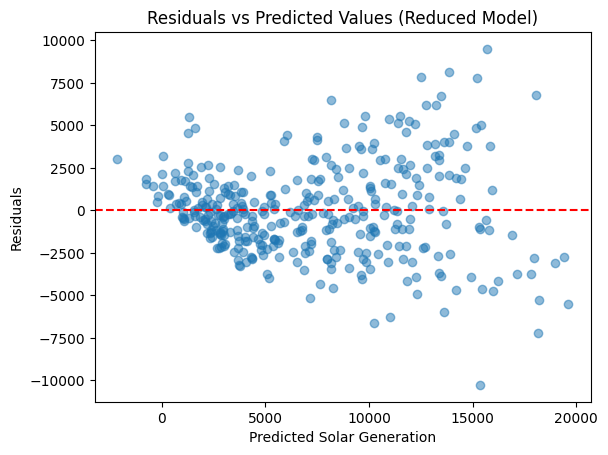

In [46]:
import matplotlib.pyplot as plt

# Get predicted values from reduced model
predicted_reduced = results_reduced.predict(X_reduced)

# Calculate residuals for reduced model
residuals_reduced = y - predicted_reduced

# Plot residuals vs predicted values
plt.scatter(predicted_reduced, residuals_reduced, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Solar Generation')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Reduced Model)')
plt.show()

Observation: A widening of the spread of residuals as the fitted values increase indicates non-constant variance (heteroscedasticity).  
The above graph suggests heteroscedasticity in the model.

### Q-Q Plot  
Check normality of residuals

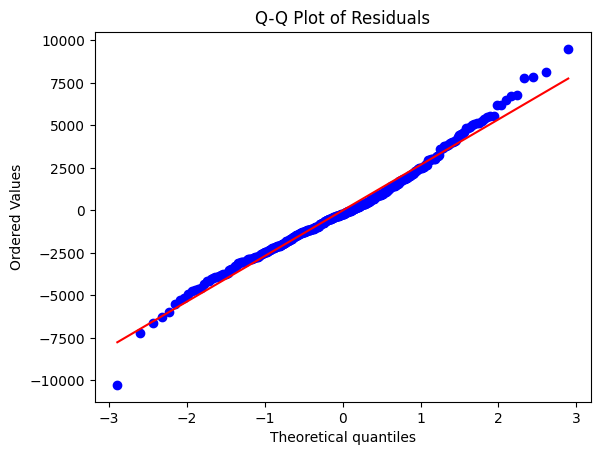

In [48]:
import scipy.stats as stats
import matplotlib.pyplot as plt

residuals = results_reduced.resid

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


Observation: Data points closely follow the diagonal line, tailing off slightly at the ends.  
This indicates that the observed data is evenly distributed.

### Histogram   
Check distribution of residuals

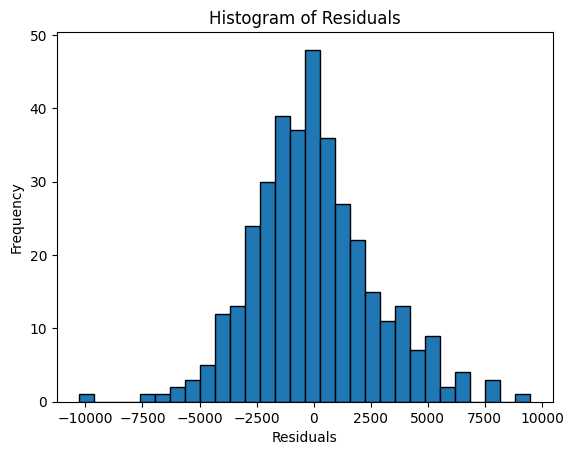

In [50]:
plt.hist(residuals, bins=30, edgecolor='k')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

Observation: The histogram is roughly bell shaped, confirming findings from Q-Q plot.  
This indicates the data is evenly distributed.

### VIF  
Check multicollinearity of predictors

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Exclude the constant when calculating VIF
X_vif = X_reduced.drop(columns='const')
vif_data = pd.DataFrame({
    "feature": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})
print(vif_data)

  feature        VIF
0    rain   1.671338
1   maxtp  24.632700
2   mintp  12.440431
3  glorad   6.198268


Observation: Applying the interpretation guide of: VIF ≈ 1: No collinearity, VIF > 5: Potential concern, VIF > 10: Serious issue.  

- glorad shows potential collinarity but remains in a safe zone (VIF 6.2).  

- maxtp and mintp are likely correlated as both are temperature and show a serious issue. (VIF maxtp = 24.63, mintp = 12.44)   
This Multicollinearity inflates standard errors and makes interpretation unstable.

Next step: check correlation between maxtp and mintp


In [53]:
df[['maxtp', 'mintp']].corr()

,maxtp,mintp
maxtp,1.000000,0.819987
mintp,0.819987,1.000000


Observation: maxtp and mintp are clearly highly correlated.  

As maxtp's R² (0.495) indicates it explains nearly 50% of the variation in solar generation.
While mintp's R² (0.094) indicates it only explains under 10% of the variation in solar generation.

mintp will be dropped from the model for this proof of concept linear regression model.  
It may later be added back in when more complex models are fitted such as Random Forest which is not sensitive to multicollinearity.

next step: Fit new model without mintp and observe results.

## Fit OLS model (reduced2)  
- Drop mintemp from new model as it is likely redundant  
- Observe affect on model correlation

### Fit reduced2 model using: rain, maxtp, glorad

In [ ]:
# Drop 'mintp' due to possible redundancy
X_reduced2 = df[['rain', 'maxtp', 'glorad']]
X_reduced2 = sm.add_constant(X_reduced2)
y = df['solargen']

# fit model
model_reduced2 = sm.OLS(y, X_reduced2)
results_reduced2 = model_reduced2.fit()

# View summary
results_reduced2.summary()

### Observe reduce2 VIF data

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Exclude the constant when calculating VIF
X_vif = X_reduced2.drop(columns='const')
vif_data = pd.DataFrame({
    "feature": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})
print(vif_data)

  feature       VIF
0    rain  1.641380
1   maxtp  6.867613
2  glorad  5.473113


Observation: The reduced2 model, excluding mintp, explains 74.3% of the variation in solar generation (R² = 0.743, p < 0.001), showing a slight decrease in explanatory power compared to the previous model of 1.3%.

Dropping mintp leads to a notable improvement in multicollinearity, with VIF values for remaining predictors reduced to acceptable levels (maxtp VIF = 6.87).

This trade-off between a small loss in R² and improved model stability and interpretability suggests that excluding mintp is beneficial for building a more reliable regression model.

Next step: Address heteroscedasticity in the model.

### Addressing heteroscedasticity within current OLS model  
- Apply log-transform on solar generation
- Refit model
- Plot residual vs fitted values
- Observe results

In [ ]:
# Log-transform the response variable
y_log = np.log(df['solargen'])

# Define predictors as before (reduced2)
X_reduced2 = df[['rain', 'maxtp', 'glorad']]
X_reduced2 = sm.add_constant(X_reduced2)

# Fit the model with log-transformed response
model_log = sm.OLS(y_log, X_reduced2)
results_log = model_log.fit()